In [1]:
from fastai.collab import *
from fastai.tabular import *
import seaborn as sns

In [2]:
ratings = pd.read_csv('/kaggle/input/songsDataset.csv')
ratings.head()

,'userID','songID','rating'
0,0,7171,5
1,0,8637,4
2,0,21966,4
3,0,35821,5
4,0,82446,5


In [3]:
ratings.columns = ['userID', 'songID', 'rating']

In [4]:
len(ratings)

2000000

In [5]:
ratings['rating'].value_counts()

5    780134
1    399243
4    344972
3    287831
2    187820
Name: rating, dtype: int64

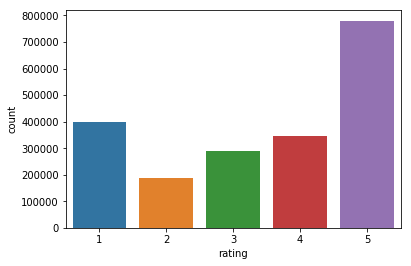

In [6]:
sns.countplot(ratings['rating'])

In [7]:
data = CollabDataBunch.from_df(ratings, seed=42, valid_pct=0.2)

In [8]:
data.show_batch()

userID,songID,target
82256,88777,5.0
28053,14985,5.0
80562,92870,4.0
63807,8060,5.0
130202,18936,5.0


In [9]:
y_range = [0.5,5.5]

In [10]:
learn = collab_learner(data, n_factors=50, y_range=y_range, wd=1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


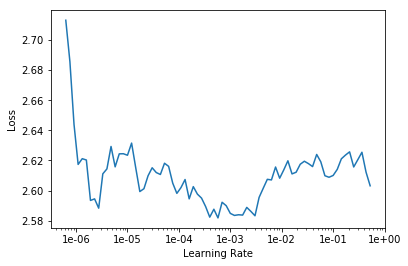

In [11]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [12]:
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,2.427008,2.454424,04:04
1,2.453463,2.451364,04:07


In [13]:
learn.save('/kaggle/working/colab-50')

In [14]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(200001, 50)
  (i_weight): Embedding(123607, 50)
  (u_bias): Embedding(200001, 1)
  (i_bias): Embedding(123607, 1)
)

In [15]:
# uncomment these lines of code to try various sizes for embeddings

# for factor in [5,10,20,30]:
#     print("results for n_factors = " + str(factor))
#     learn = collab_learner(data, n_factors=factor, y_range=y_range, wd=1e-1)
#     learn.fit_one_cycle(5, 5e-3)